In [1]:
#Araba Sınıflandırma Projesi

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("13-car_evaluation.csv")

In [6]:
df.head()  #kolon isimlerini düzeltelim

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [7]:
df.shape

(1727, 7)

In [8]:
col_names = ["Buying", "Maint", "Doors", "Persons", "Lug_boot", "Safety", "Class"]

In [9]:
df.columns = col_names

In [10]:
df.head()  #vhigh -> very high

,Buying,Maint,Doors,Persons,Lug_boot,Safety,Class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Buying    1727 non-null   object
 1   Maint     1727 non-null   object
 2   Doors     1727 non-null   object
 3   Persons   1727 non-null   object
 4   Lug_boot  1727 non-null   object
 5   Safety    1727 non-null   object
 6   Class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [13]:
for col in df.columns:
    print(df[col].value_counts())  #balance veya olmayan dataları inceleyelim

Buying
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
Maint
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
Doors
3        432
4        432
5more    432
2        431
Name: count, dtype: int64
Persons
4       576
more    576
2       575
Name: count, dtype: int64
Lug_boot
med      576
big      576
small    575
Name: count, dtype: int64
Safety
med     576
high    576
low     575
Name: count, dtype: int64
Class
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64


In [17]:
df.isnull().sum()

Buying      0
Maint       0
Doors       0
Persons     0
Lug_boot    0
Safety      0
Class       0
dtype: int64

In [18]:
#Feature Engineering

In [19]:
#class->target variable
#doors,persons->numeric variable
#Diğerleri->categorical               yapacağım

In [21]:
df["Doors"].unique()  #5+ ve fazlası kapılar için 5 olarak ayarlansın

array(['2', '3', '4', '5more'], dtype=object)

In [31]:
df['Doors'] = df['Doors'].replace('5more', '5')

In [32]:
df['Doors'] = df['Doors'].astype(int)

In [33]:
df["Doors"].unique()

array([2, 3, 4, 5])

In [42]:
df["Persons"].unique()  #more->5 olarak ayarladım tekrar derlediğim için yeni hali çıkıyo

array([2, 4, 5])

In [43]:
df['Persons'] = df['Persons'].replace('more', '5')

In [44]:
df['Persons'] = df['Persons'].astype(int)

In [45]:
df["Persons"].unique()

array([2, 4, 5])

In [47]:
df.info()  #buying,maint,lugBoot,safety object olarak kalacak çünkü kategorik değişkenler

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Buying    1727 non-null   object
 1   Maint     1727 non-null   object
 2   Doors     1727 non-null   int64 
 3   Persons   1727 non-null   int64 
 4   Lug_boot  1727 non-null   object
 5   Safety    1727 non-null   object
 6   Class     1727 non-null   object
dtypes: int64(2), object(5)
memory usage: 94.6+ KB


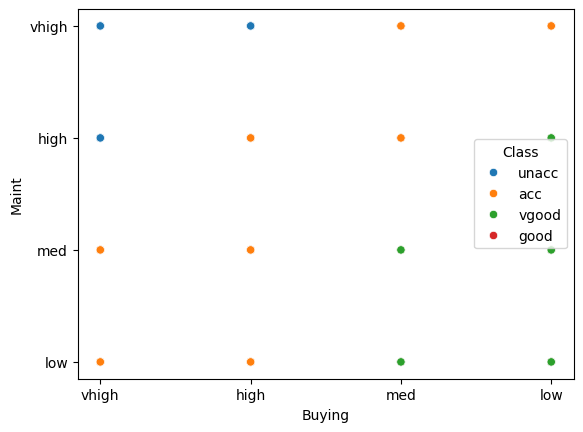

In [49]:
sns.scatterplot(x=df["Buying"], y=df["Maint"], hue=df["Class"])
plt.show()

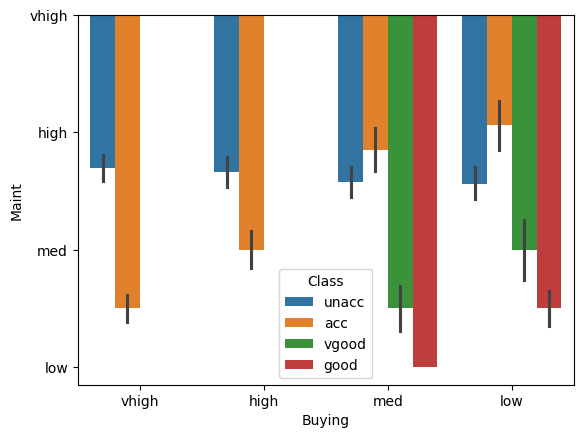

In [51]:
sns.barplot(x=df["Buying"], y=df["Maint"], hue=df["Class"])
plt.show()

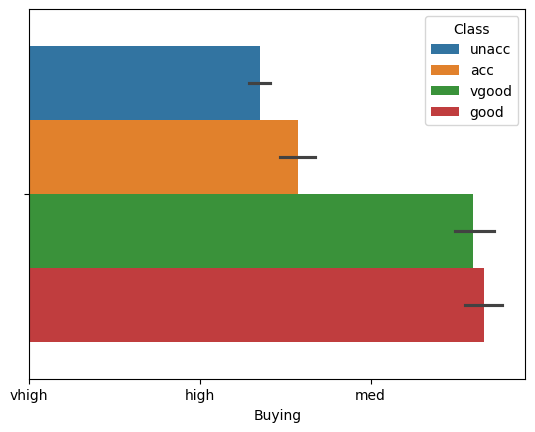

In [55]:
sns.barplot(x=df["Buying"], hue=df["Class"])
plt.show()

In [56]:
#Encoding yapacağız en mantıklısı ordinal encoding yapmak olur

In [57]:
X = df.drop("Class", axis=1)
y = df["Class"]

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=15)

In [60]:
X_train.shape

(1208, 6)

In [61]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [64]:
for col in categorical_cols:
    print(df[col].value_counts())

Buying
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
Maint
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
Lug_boot
med      576
big      576
small    575
Name: count, dtype: int64
Safety
med     576
high    576
low     575
Name: count, dtype: int64


In [66]:
categorical_cols = ["Buying", "Maint", "Lug_boot", "Safety"]
numerical_cols = ["Doors", "Persons"]

ordinal_encoder = OrdinalEncoder(categories=[
    ["low","med","high","vhigh"], #buying
    ["low","med","high","vhigh"], #maint
    ["small","med","big"],#lugBoot
    ["low","med","high"] #safety
])

#transformer kullanımı
#aynı anda birçok transformasyonu tuple halinde vererek yapabiliriz
preprocessor = ColumnTransformer(transformers= [
    ("transformation_name_doesnt_matter", ordinal_encoder, categorical_cols),
], remainder ="passthrough")

X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

In [71]:
X_train_transformed

array([[0., 3., 1., 1., 3., 2.],
       [0., 2., 1., 1., 5., 4.],
       [0., 2., 0., 1., 3., 4.],
       ...,
       [3., 0., 2., 1., 4., 2.],
       [2., 2., 2., 1., 5., 5.],
       [0., 2., 1., 2., 4., 5.]])

In [72]:
#Data Hazır

In [74]:
from sklearn.tree import DecisionTreeClassifier

In [75]:
tree_model = DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=0)

tree_model.fit(X_train_transformed, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [76]:
y_pred = tree_model.predict(X_test_transformed)

In [77]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [78]:
print(accuracy_score(y_test, y_pred))  #%78 çok da iyi değil
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.7861271676300579
[[ 62   0  59   0]
 [ 21   0   0   0]
 [ 10   0 346   0]
 [ 21   0   0   0]]
              precision    recall  f1-score   support

         acc       0.54      0.51      0.53       121
        good       0.00      0.00      0.00        21
       unacc       0.85      0.97      0.91       356
       vgood       0.00      0.00      0.00        21

    accuracy                           0.79       519
   macro avg       0.35      0.37      0.36       519
weighted avg       0.71      0.79      0.75       519



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[Text(0.3333333333333333, 0.875, 'Persons <= 3.0\ngini = 0.451\nsamples = 1208\nvalue = [263, 48, 853, 44]'),
 Text(0.16666666666666666, 0.625, 'gini = 0.0\nsamples = 409\nvalue = [0, 0, 409, 0]'),
 Text(0.25, 0.75, 'True  '),
 Text(0.5, 0.625, 'Safety <= 0.5\ngini = 0.576\nsamples = 799\nvalue = [263, 48, 444, 44]'),
 Text(0.41666666666666663, 0.75, '  False'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 269\nvalue = [0, 0, 269, 0]'),
 Text(0.6666666666666666, 0.375, 'Buying <= 1.5\ngini = 0.63\nsamples = 530\nvalue = [263, 48, 175, 44]'),
 Text(0.5, 0.125, 'gini = 0.647\nsamples = 270\nvalue = [142, 48, 36, 44]'),
 Text(0.8333333333333334, 0.125, 'gini = 0.498\nsamples = 260\nvalue = [121, 0, 139, 0]')]

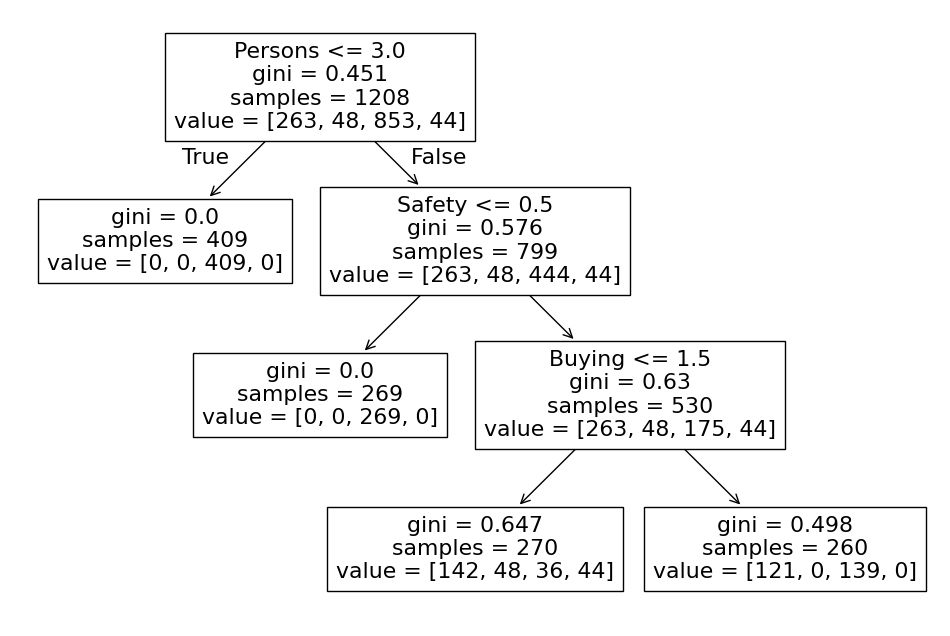

In [80]:
plt.figure(figsize=(12,8))

from sklearn import tree

columns_names = categorical_cols +numerical_cols #yazıldığı sırayla birleştirir
tree.plot_tree(tree_model.fit(X_train_transformed, y_train), feature_names=columns_names)

In [81]:
#işte karar ağacı

In [83]:
#iyileştirme için hyperparameter tunning yapıcaz

In [84]:
param = {
    "criterion": ["gini", "entropy", "log_loss"],
    "splitter": ["best", "random"],
    "max_depth": [1,2,3,4,5,15,None],
    "max_features": ["sqrt", "log2", None]
}

In [85]:
from sklearn.model_selection import GridSearchCV

In [86]:
grid = GridSearchCV(estimator = DecisionTreeClassifier(), param_grid=param, cv=5, scoring="accuracy")

In [87]:
import warnings
warnings.filterwarnings("ignore")  #uyarıları gizleyelim

In [90]:
grid.fit(X_train_transformed, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 15, None],
                         'max_features': ['sqrt', 'log2', None],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [92]:
grid.best_params_  # bunları kullanarak oluştur diyo

{'criterion': 'log_loss',
 'max_depth': 15,
 'max_features': None,
 'splitter': 'random'}

In [93]:
y_pred = grid.predict(X_test_transformed)

In [95]:
print(accuracy_score(y_test, y_pred))  
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9730250481695568
[[118   0   2   1]
 [  1  19   0   1]
 [  9   0 347   0]
 [  0   0   0  21]]
              precision    recall  f1-score   support

         acc       0.92      0.98      0.95       121
        good       1.00      0.90      0.95        21
       unacc       0.99      0.97      0.98       356
       vgood       0.91      1.00      0.95        21

    accuracy                           0.97       519
   macro avg       0.96      0.96      0.96       519
weighted avg       0.97      0.97      0.97       519



In [96]:
#ağacı çizdirelim bakalım nasıl değişti

In [98]:
tree_model_new = DecisionTreeClassifier(criterion="log_loss", max_depth=15, max_features=None, splitter="random")

In [99]:
tree_model_new.fit(X_train_transformed, y_train)
y_pred = tree_model_new.predict(X_test_transformed)
print(accuracy_score(y_test, y_pred))  
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9633911368015414
[[114   2   5   0]
 [  0  20   0   1]
 [  8   0 348   0]
 [  1   2   0  18]]
              precision    recall  f1-score   support

         acc       0.93      0.94      0.93       121
        good       0.83      0.95      0.89        21
       unacc       0.99      0.98      0.98       356
       vgood       0.95      0.86      0.90        21

    accuracy                           0.96       519
   macro avg       0.92      0.93      0.93       519
weighted avg       0.96      0.96      0.96       519



[Text(0.48811141304347827, 0.9642857142857143, 'Persons <= 3.002\nlog_loss = 1.192\nsamples = 1208\nvalue = [263, 48, 853, 44]'),
 Text(0.477241847826087, 0.8928571428571429, 'log_loss = 0.0\nsamples = 409\nvalue = [0, 0, 409, 0]'),
 Text(0.4826766304347826, 0.9285714285714286, 'True  '),
 Text(0.49898097826086957, 0.8928571428571429, 'Safety <= 1.844\nlog_loss = 1.473\nsamples = 799\nvalue = [263, 48, 444, 44]'),
 Text(0.49354619565217395, 0.9285714285714286, '  False'),
 Text(0.1983695652173913, 0.8214285714285714, 'Safety <= 0.355\nlog_loss = 1.061\nsamples = 540\nvalue = [132, 26, 382, 0]'),
 Text(0.1875, 0.75, 'log_loss = 0.0\nsamples = 269\nvalue = [0, 0, 269, 0]'),
 Text(0.20923913043478262, 0.75, 'Lug_boot <= 0.358\nlog_loss = 1.356\nsamples = 271\nvalue = [132, 26, 113, 0]'),
 Text(0.10869565217391304, 0.6785714285714286, 'Buying <= 2.869\nlog_loss = 0.793\nsamples = 88\nvalue = [21, 0, 67, 0]'),
 Text(0.09782608695652174, 0.6071428571428571, 'Maint <= 1.788\nlog_loss = 0.897\

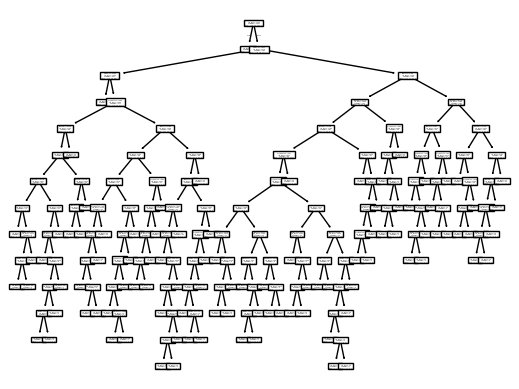

In [100]:
tree.plot_tree(tree_model_new.fit(X_train_transformed, y_train), feature_names=columns_names)